<a href="https://colab.research.google.com/github/eshal26/Leukemia-classification/blob/main/ResNet152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Original.zip

Archive:  Original.zip
   creating: Original/Benign/
  inflating: Original/Benign/WBC-Benign-001.jpg  
  inflating: Original/Benign/WBC-Benign-002.jpg  
  inflating: Original/Benign/WBC-Benign-003.jpg  
  inflating: Original/Benign/WBC-Benign-004.jpg  
  inflating: Original/Benign/WBC-Benign-005.jpg  
  inflating: Original/Benign/WBC-Benign-006.jpg  
  inflating: Original/Benign/WBC-Benign-007.jpg  
  inflating: Original/Benign/WBC-Benign-008.jpg  
  inflating: Original/Benign/WBC-Benign-009.jpg  
  inflating: Original/Benign/WBC-Benign-010.jpg  
  inflating: Original/Benign/WBC-Benign-011.jpg  
  inflating: Original/Benign/WBC-Benign-012.jpg  
  inflating: Original/Benign/WBC-Benign-013.jpg  
  inflating: Original/Benign/WBC-Benign-014.jpg  
  inflating: Original/Benign/WBC-Benign-015.jpg  
  inflating: Original/Benign/WBC-Benign-016.jpg  
  inflating: Original/Benign/WBC-Benign-017.jpg  
  inflating: Original/Benign/WBC-Benign-018.jpg  
  inflating: Original/Benign/WBC-Benign-019.jpg

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import sklearn
from sklearn.model_selection import train_test_split

import shutil

# Define paths to your dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Create the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Move images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    for img_file in os.listdir(stage_dir):
        img_path = os.path.join(stage_dir, img_file)
        shutil.move(img_path, malignant_dir)

# Update dataset directory structure and labels
os.rmdir(os.path.join(dataset_dir, 'Early'))
os.rmdir(os.path.join(dataset_dir, 'Pre'))
os.rmdir(os.path.join(dataset_dir, 'Pro'))


In [ ]:

from sklearn.model_selection import train_test_split

# Define paths to your original dataset directory
original_data_dir = 'Original'
benign_dir = os.path.join(original_data_dir, 'Benign')
malignant_dir = os.path.join(original_data_dir, 'Malignant')

# Define paths to create directories for the new dataset splits
train_dir = 'train_dataset'
val_dir = 'validation_dataset'
test_dir = 'test_dataset'

# Create directories for the new dataset splits if they don't exist
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Split dataset and copy images to appropriate directories
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
    train_files, test_val_files = train_test_split(image_files, test_size=0.2, random_state=42)
    val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

    for file in train_files:
        shutil.copy(file, os.path.join(train_dir, category))
    for file in val_files:
        shutil.copy(file, os.path.join(val_dir, category))
    for file in test_files:
        shutil.copy(file, os.path.join(test_dir, category))


In [ ]:

from torch.utils.data import DataLoader

# Define paths to your dataset directories
train_dir = 'train_dataset'
val_dir = 'validation_dataset'
test_dir = 'test_dataset'

# Define transformations for training, validation, and testing data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create datasets
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=val_test_transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




In [ ]:
dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset), 'test': len(test_dataset)}
class_names = train_dataset.classes

In [ ]:
import torch.nn as nn
from torchvision import models

# Load ResNet-152 model pre-trained on ImageNet
model_resnet152 = models.resnet152(pretrained=True)

# Modify the final layer to match the number of classes
num_features = model_resnet152.fc.in_features
model_resnet152.fc = nn.Linear(num_features, 2)

model_resnet152 = model_resnet152.to(device)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

# Use a pre-trained optimizer
optimizer = optim.SGD(model_resnet152.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler
from torch.optim import lr_scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


Epoch 0/14
----------
train Loss: 0.1670 Acc: 0.9393
val Loss: 0.0508 Acc: 0.9908

Epoch 1/14
----------
train Loss: 0.0236 Acc: 0.9939
val Loss: 0.0153 Acc: 0.9938

Epoch 2/14
----------
train Loss: 0.0095 Acc: 0.9985
val Loss: 0.0138 Acc: 0.9938

Epoch 3/14
----------
train Loss: 0.0076 Acc: 0.9981
val Loss: 0.0154 Acc: 0.9938

Epoch 4/14
----------
train Loss: 0.0044 Acc: 0.9996
val Loss: 0.0123 Acc: 0.9938

Epoch 5/14
----------
train Loss: 0.0074 Acc: 0.9977
val Loss: 0.0152 Acc: 0.9969

Epoch 6/14
----------
train Loss: 0.0024 Acc: 1.0000
val Loss: 0.0113 Acc: 0.9938

Epoch 7/14
----------
train Loss: 0.0026 Acc: 0.9996
val Loss: 0.0118 Acc: 0.9969

Epoch 8/14
----------
train Loss: 0.0019 Acc: 1.0000
val Loss: 0.0120 Acc: 0.9969

Epoch 9/14
----------
train Loss: 0.0024 Acc: 1.0000
val Loss: 0.0127 Acc: 0.9969

Epoch 10/14
----------
train Loss: 0.0017 Acc: 1.0000
val Loss: 0.0119 Acc: 0.9938

Epoch 11/14
----------
train Loss: 0.0018 Acc: 1.0000
val Loss: 0.0122 Acc: 0.9938

Ep

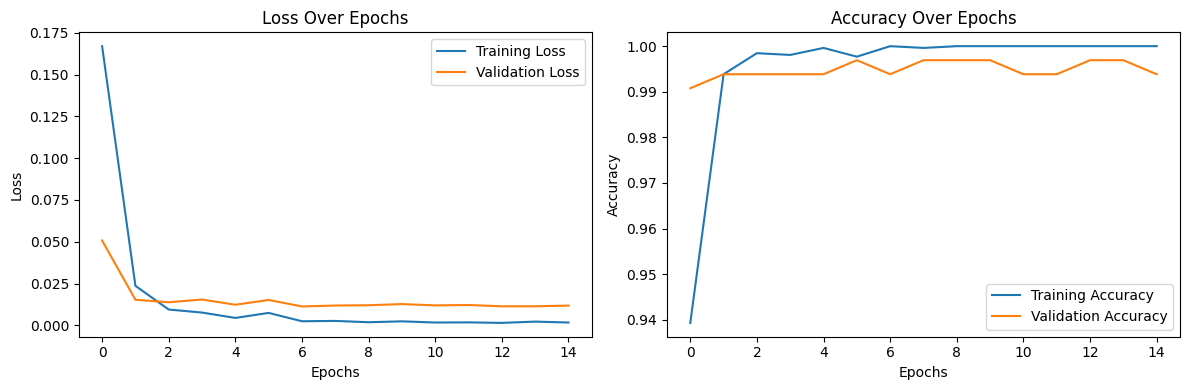

In [ ]:
import matplotlib.pyplot as plt

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)

    # Plot accuracy and loss over epochs
    plot_metrics(train_loss_history, val_loss_history, train_acc_history, val_acc_history)

    return model

def plot_metrics(train_loss, val_loss, train_acc, val_acc):
    epochs = range(len(train_loss))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train the model and plot metrics
model_resnet152 = train_model(model_resnet152, criterion, optimizer, exp_lr_scheduler, num_epochs=15)


In [30]:
torch.save(model_resnet152.state_dict(), 'resnet152_best_model.pth')


Test Loss: 0.0050
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1-score: 1.0000
Confusion Matrix:
 [[ 51   0]
 [  0 276]]


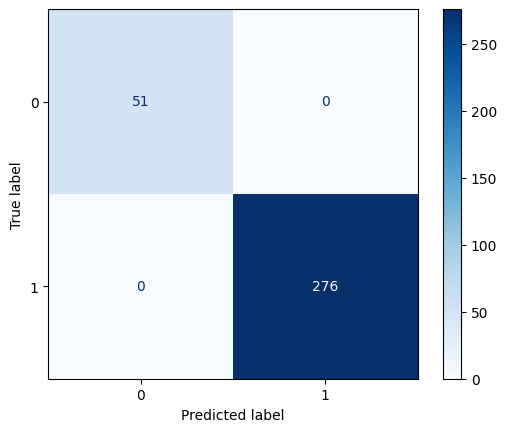

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00       276

    accuracy                           1.00       327
   macro avg       1.00      1.00      1.00       327
weighted avg       1.00      1.00      1.00       327



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model_with_detailed_metrics(model, dataloader, criterion, device):
    model.eval()
    test_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    test_loss /= len(dataloader.dataset)
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f'Test Loss: {test_loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test Precision: {precision:.4f}')
    print(f'Test Recall: {recall:.4f}')
    print(f'Test F1-score: {f1:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Print classification report
    class_report = classification_report(all_labels, all_preds)
    print("Classification Report:\n", class_report)

    return test_loss, accuracy, precision, recall, f1, cm, class_report

test_loss_resnet152, test_accuracy_resnet152, test_precision_resnet152, test_recall_resnet152, test_f1_resnet152, cm_resnet152, class_report_resnet152 = evaluate_model_with_detailed_metrics(model_resnet152, dataloaders['test'], criterion, device)